In [36]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
os.chdir('C:/Users/User/Documents/Empirial Stock Market Analysis/Airlines Developed')

In [113]:
def get_max_close(symbol):
    data = pd.read_csv(symbol + '.csv')
    return data['Close'].max()

In [114]:
get_max_close('AAL')

62.950001

In [115]:
def plot_close(symbol):
    data = pd.read_csv(symbol + '.csv')
    data['Close'].plot()
    plt.show()

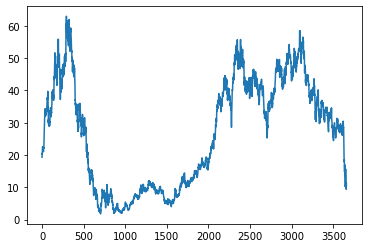

In [116]:
plot_close('AAL')

In [117]:
def plot_adj_close(symbol):
    data = pd.read_csv(symbol + '.csv')
    data[['Adj Close', 'Close']].plot()
    plt.show()

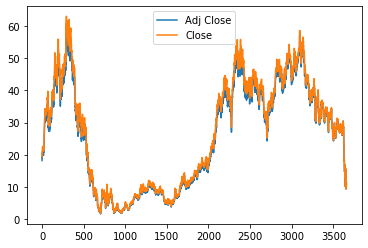

In [118]:
plot_adj_close('AAL')

In [119]:
start_date = '01-01-2018'
end_date = '01-01-2020'

In [120]:
dates = pd.date_range(start_date, end_date)

In [121]:
df1 = pd.DataFrame(index = dates)

In [122]:
df_aal = pd.read_csv('AAL.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'])


In [123]:
df1 = df1.join(df_aal, how='inner')

In [124]:
df1.head()

,Adj Close
2018-01-02,51.647556
2018-01-03,51.014027
2018-01-04,51.335667
2018-01-05,51.316177
2018-01-08,50.809345


In [125]:
syms = ['DAL', 'LUV', 'UAL', 'SPY', 'GLD']

for sym in syms:
    df_temp = pd.read_csv(sym + '.csv', index_col = 'Date', parse_dates = True, usecols = ['Date', 'Adj Close'], na_values = ['nan'] )
    df_temp = df_temp.rename(columns={'Adj Close':sym})
    df1 = df1.join(df_temp, how='inner')

In [126]:
df1.head()

,Adj Close,DAL,LUV,UAL,SPY,GLD
2018-01-02,51.647556,53.521435,64.447029,68.940002,257.345001,125.150002
2018-01-03,51.014027,52.530994,63.105392,68.489998,258.972717,124.820000
2018-01-04,51.335667,52.530994,62.901241,69.260002,260.064240,125.459999
2018-01-05,51.316177,52.795113,62.531811,69.360001,261.797302,125.330002
2018-01-08,50.809345,51.578281,62.220699,68.510002,262.276093,125.309998


In [127]:
df1 = df1.rename(columns={'Adj Close':'AAL'})

In [128]:
df1

,AAL,DAL,LUV,UAL,SPY,GLD
2018-01-02,51.647556,53.521435,64.447029,68.940002,257.345001,125.150002
2018-01-03,51.014027,52.530994,63.105392,68.489998,258.972717,124.820000
2018-01-04,51.335667,52.530994,62.901241,69.260002,260.064240,125.459999
2018-01-05,51.316177,52.795113,62.531811,69.360001,261.797302,125.330002
2018-01-08,50.809345,51.578281,62.220699,68.510002,262.276093,125.309998
...,...,...,...,...,...,...
2019-12-24,29.072563,58.982910,54.729366,89.150002,319.352142,141.270004
2019-12-26,29.560759,59.151745,54.689522,89.260002,321.052124,142.380005
2019-12-27,28.335287,58.675037,54.111744,88.370003,320.972565,142.330002
2019-12-30,28.195801,58.257912,53.872665,87.959999,319.202972,142.630005


In [129]:
def plot_data(df, title = 'Stock Prices'):
    df.plot(title = title)
    plt.xlabel('Dates')
    plt.ylabel('Price')
    plt.show()

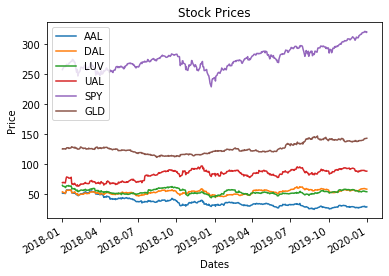

In [130]:
plot_data(df1)

In [131]:
def normalize_data(df):
    return df / df.iloc[0,:]

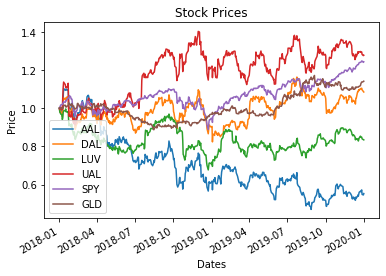

In [132]:
df2 = normalize_data(df1)
plot_data(df2)

In [133]:
# Mean Adj. close
df1.mean()

AAL     36.223943
DAL     53.165380
LUV     53.614557
UAL     82.050616
SPY    275.355011
GLD    125.858410
dtype: float64

In [134]:
# Median Adj. close
df1.median()

AAL     33.915291
DAL     53.156002
LUV     52.694939
UAL     84.519997
SPY    272.698029
GLD    124.279999
dtype: float64

In [135]:
# Std. dev Adj. close
df1.std()

AAL     7.843798
DAL     3.569865
LUV     3.897152
UAL     8.589733
SPY    17.203380
GLD     9.111686
dtype: float64

In [136]:
def rolling_mean(sym):
    df1[sym].plot()
    df1[sym].rolling(20).mean().plot()
    plt.title('Rolling Mean Plot')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

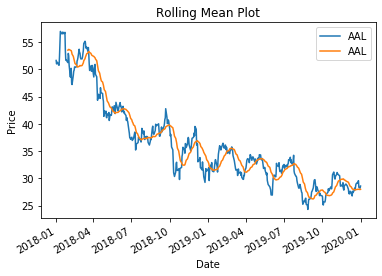

In [137]:
rolling_mean('AAL')

In [138]:
# Daily returns

def daily_returns(sym):
    prices = df1[sym]
    (prices.shift(1) / prices - 1).plot()
    plt.title('Daily Returns')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()

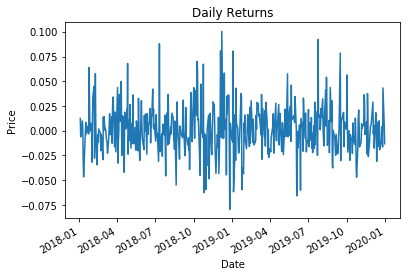

In [139]:
daily_returns('AAL')

In [140]:
# Distribution of Daily returns
def daily_return_dist(sym):
    prices = df1[sym]
    sns.distplot((prices.shift(1) / prices - 1))
    plt.show()
    

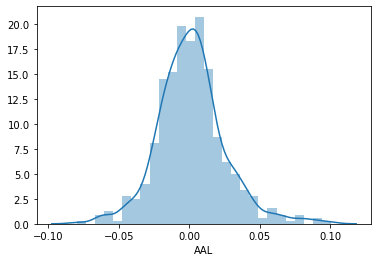

In [141]:
daily_return_dist('AAL')

In [142]:
def daily_return(sym):
    prices = df1[sym]
    return (prices.shift(1) / prices - 1)

In [143]:
# Mean of daily return
mean = daily_return('AAL').mean()
mean

0.0014674574590543196

In [144]:
# std of daily return
std = daily_return('AAL').std()
std

0.02410483443692743

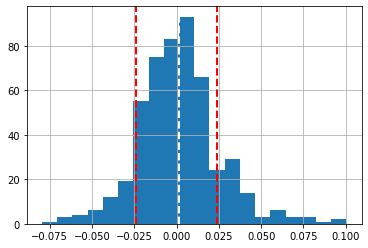

In [145]:
daily_return('AAL').hist(bins=20)
plt.axvline(mean, color ='w', linestyle='dashed', linewidth = 2)
plt.axvline(std, color ='r', linestyle='dashed', linewidth = 2)
plt.axvline(-std, color ='r', linestyle='dashed', linewidth = 2)
plt.show()

In [146]:
daily_return('AAL').kurtosis()

1.7977670900063578

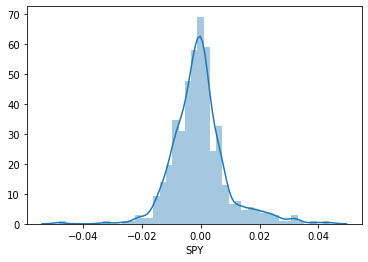

In [147]:
daily_return_dist('SPY')

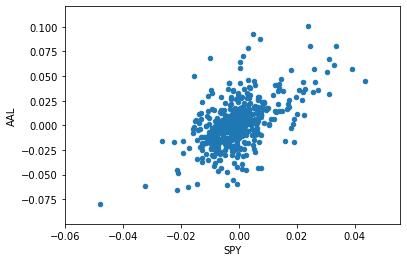

In [148]:
daily_return(['AAL', 'SPY']).plot(kind = 'scatter', x = 'SPY', y = 'AAL')
plt.show()

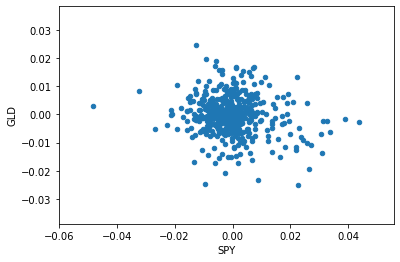

In [151]:
daily_return(['GLD', 'SPY']).plot(kind = 'scatter', x = 'SPY', y = 'GLD')
plt.show()

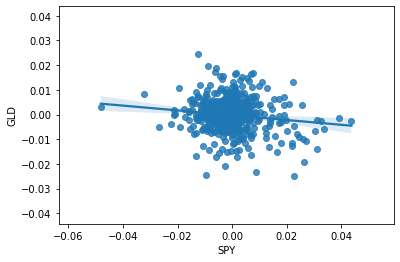

In [152]:
sns.regplot(x = 'SPY', y = 'GLD', data = daily_return(['GLD', 'SPY']))
plt.show()

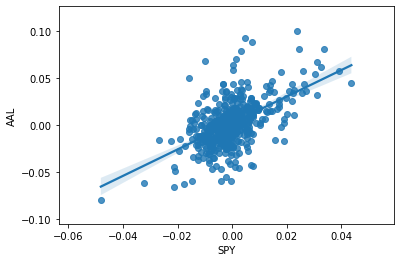

In [153]:
sns.regplot(x = 'SPY', y = 'AAL', data = daily_return(['AAL', 'SPY']))
plt.show()

In [154]:
daily_return(['AAL', 'SPY']).corr()

,AAL,SPY
AAL,1.00000,0.55349
SPY,0.55349,1.00000
